In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\Hamzat\Downloads\DS materials\iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.shape

(150, 6)

In [8]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [10]:
df.info() #basic info about datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
df['Species'].value_counts() #for each no. of samples on each class

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [20]:
df = df.drop(columns= ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
df.isnull().sum() #to check for null values

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

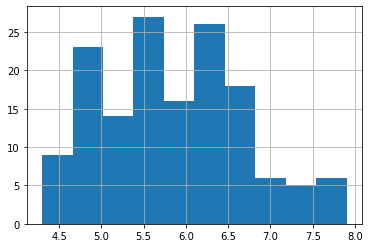

In [23]:
df['SepalLengthCm'].hist()

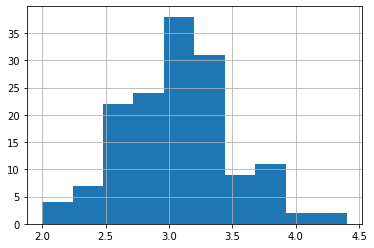

In [26]:
df['SepalWidthCm'].hist()

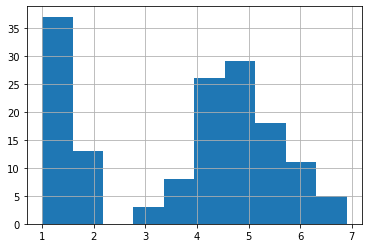

In [25]:
df['PetalLengthCm'].hist()

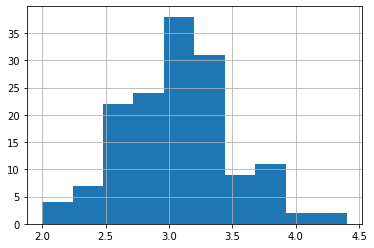

In [27]:
df['SepalWidthCm'].hist()

In [40]:
colors = ['red','orange', 'blue']
species =['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

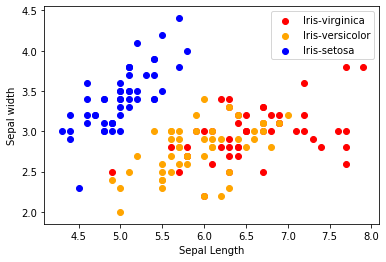

In [41]:
for i in range(3):
    x = df[df['Species'] ==species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c= colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal width')
plt.legend()

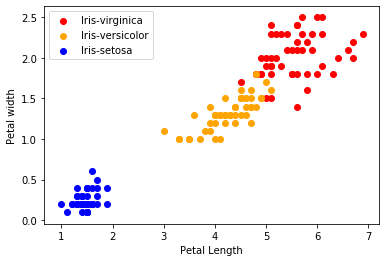

In [42]:
for i in range(3):
    x = df[df['Species'] ==species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c= colors[i], label=species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal width')
plt.legend()

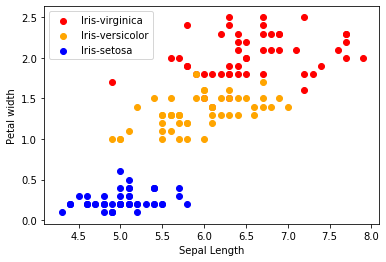

In [43]:
for i in range(3):
    x = df[df['Species'] ==species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalWidthCm'], c= colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal width')
plt.legend()

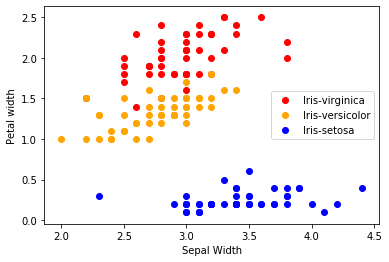

In [44]:
for i in range(3):
    x = df[df['Species'] ==species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c= colors[i], label=species[i])
plt.xlabel('Sepal Width')
plt.ylabel('Petal width')
plt.legend()

In [45]:
#correlation matrix
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


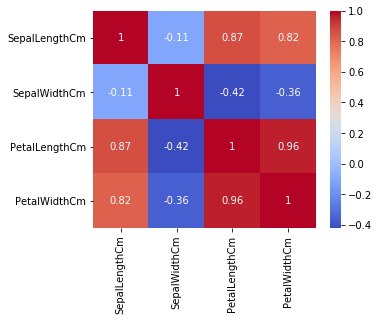

In [49]:
corr =df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap= 'coolwarm')

In [58]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [59]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [85]:
#Model Training
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

In [86]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [87]:
model.fit(x_train, y_train) #model training

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
#print metric to get performance
print('Accuraccy: ',model.score(x_test, y_test)*100)

Accuraccy:  100.0


In [89]:
#knn
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [90]:
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [91]:
#print metric to get performance
print('Accuraccy: ',model.score(x_test, y_test)*100)

Accuraccy:  96.66666666666667


In [92]:
#decisiom tree
from sklearn.tree import DecisionTreeClassifier
model =DecisionTreeClassifier()

In [93]:
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [94]:
#print metric to get performance
print('Accuraccy: ',model.score(x_test, y_test)*100)

Accuraccy:  96.66666666666667
